In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
from xmovie import Movie

/Users/juliusbusecke/miniconda/envs/standard/lib/python3.6/site-packages/distributed/utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 51] Network is unreachable
  % (host, default, e), RuntimeWarning)


## TODO for this feature
- [x] Clean up progress/verbose kwargs. I need fine grained control over frame progress and ffmpeg progress.
- [ ] Start CI

## Pushed to next feature branch:
- [ ] Start Docs
- [ ] Add automatic gif conversion???
- [ ] Expand options for ffmpeg conversion + gif conversion
- [ ] Trigger all warnings that come with the plotfunction with an example frame (invisible)

# Documentation
## Basic use

In [3]:
# Load example dataset
ds = xr.tutorial.open_dataset('air_temperature').load().isel(time=slice(0,20))
ds['airx4'] = ds['air'] * 4
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 20)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-01-05T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.6 296.69998
    airx4    (time, lat, lon) float32 964.8 970.0 974.0 ... 1186.4 1186.7999
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### Setting up the movie object

The simplest way to create a movie is to pass a dataarray to `Movie`.
You can simply preview the movie frame with the `Movie.preview` function.

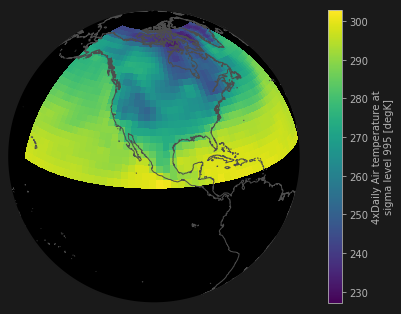

In [4]:
mov = Movie(ds.air)
mov.preview(10);
# I havent figured out how to return a fig from `Movie.preview` without it plotting twice...

If a dataset is supplied, xmovie chooses the first data_variable.

/Users/juliusbusecke/Work/CODE/PYTHON/xmovie/xmovie/presets.py:32: UserWarning: No plot_variable supplied. Defaults to `air`
  UserWarning,


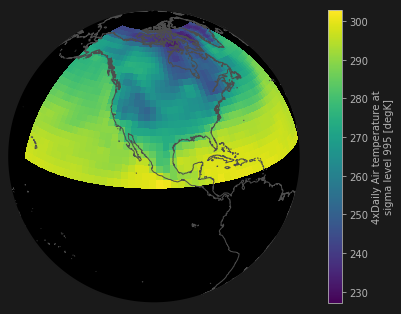

In [5]:
mov = Movie(ds)
mov.preview(10);

You can choose which variable to plot with `plot_variable`. This will enable to visualize several variables at the same time (feature not quite ready yet, but coming soon).

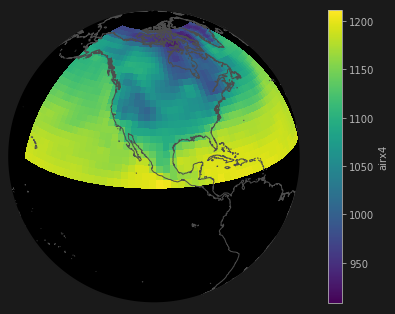

In [6]:
mov = Movie(ds, plot_variable='airx4')
mov.preview(10);

## Creating a movie
Now you can save out a movie

In [7]:
mov.save('movie.mp4') #Thats it!

Movie created at movie.mp4


In [8]:
from IPython.display import HTML
HTML("""
<video width="500" controls>
  <source src="movie.mp4" type="video/mp4">
</video>
""")

# How can I display this easily in the docs?

You can also create a gif animation simply by changing the output filename extension to `.gif`.
> The gif is created by first creating a movie and then converting it. If you choose the same filename as an existing movie, you will get an Error

In [9]:
mov.save('animation.gif')

Movie created at animation.mp4
GIF created at animation.gif


Rendering out all frames can take a while, especially with higher resolution fields. With the optional depenceny `tqdm` you can display a progress bar.

In [10]:
mov.save('movie_progress.mp4', progress=True)

100%|██████████| 20/20 [00:04<00:00,  3.87it/s]


Movie created at movie_progress.mp4


In many cases it is useful to have both a high quality movie and a lower resolution gif of the same animation. If that is desired, just deactivate the `remove_movie` option and give a filename with `.gif`. xmovie will first render a high quality movie and then convert it to a gif, without removing the movie afterwards.

In [11]:
mov.save('combo.gif',remove_movie=False)

Movie created at combo.mp4
GIF created at combo.gif


In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [13]:
fig.get_figwidth()

6.0